In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
#preparing i/p, o/p variables
x=df['YearsExperience']
y=df['Salary']

In [5]:
#splitting the train, test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
x_train=x_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)
x_test.shape

(6, 1)

In [6]:
#Fit the simple linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
#predicting the test set variables
y_pred = regressor.predict(np.array([0,11,11.5]).reshape(-1,1))
np.round(y_pred)

array([ 26780., 129218., 133875.])

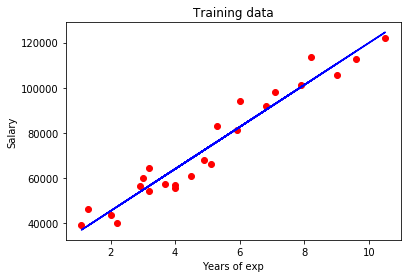

In [38]:
 #Visulaizing the training results
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.xlabel('Years of exp')
plt.ylabel('Salary')
plt.title('Training data')
plt.show()

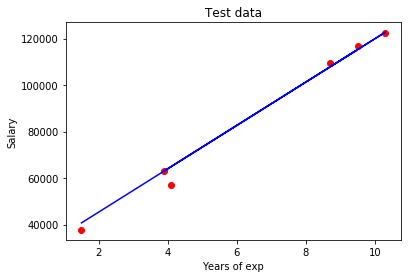

In [9]:
 #Visualizing the test set
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,regressor.predict(x_test),color='blue')
plt.xlabel('Years of exp')
plt.ylabel('Salary')
plt.title('Test data')
plt.show()

In [10]:
#Evolution matrix
from sklearn import metrics
print('\nMAE:',metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred))
print('\nMSE:',metrics.mean_squared_error(y_true=y_test,y_pred=y_pred))
print('\nRMSE:',np.sqrt(metrics.mean_squared_error(y_true=y_test,y_pred=y_pred)))


MAE: 2446.1723690465055

MSE: 12823412.298126549

RMSE: 3580.979237321343


In [11]:
#R2
r_square = metrics.r2_score(y_test,y_pred)
print('\nr_square:', r_square)


r_square: 0.988169515729126


In [12]:
regressor.coef_

array([9312.57512673])

In [13]:
regressor.intercept_

26780.09915062818

# SGD

In [18]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd=sgd.fit(x_train,y_train)

C:\Users\Narayana\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [20]:
sgd=sgd.predict(x_test)

In [21]:
sgd

array([ 23624.37694772, 136538.17244495,  56985.2710719 ,  54419.04844696,
       126273.2819452 , 116008.39144546])

# Ridge

In [25]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.5, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_test)
pred

array([ 51794.71067159, 106428.4847484 ,  67936.50755792,  66694.83087436,
       101461.77801415,  96495.07127989])

In [26]:
ridgeReg.coef_

array([6208.38341782])

In [27]:
ridgeReg.intercept_

42482.13554486322

# LASSO

In [33]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.1, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_test)
pred

array([ 40749.63673748, 122698.62878718,  64961.83893398,  63099.36184194,
       115248.72041903, 107798.81205087])

In [30]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [45]:
lassoReg.coef_

array([9312.38546019])

# Elastic Net

In [47]:
from sklearn.linear_model import ElasticNet

## training the model

Elreg = ElasticNet(random_state=0)
        

Elreg.fit(x_train,y_train)

pred = Elreg.predict(x_test)
pred

array([ 43059.52138548, 119296.01182326,  65583.93901483,  63851.29150488,
       112365.42178346, 105434.83174366])

In [48]:
Elreg.coef_

array([8663.23754975])